In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier

# DATA SET IMPORTING

In [2]:
#read_csv is an important pandas function to read csv files and do operations on it.
data=pd.read_csv('heart.csv')

In [3]:
data.head(20)
#Pandas head() method is used to return top n (5 by default) rows of a data frame or series.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [4]:
data.info()
#Pandas dataframe.info() function is used to get a concise summary of the dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


'A histogram shows the frequency on the vertical axis and the horizontal axis is another dimension. Usually it has bins, \nwhere every bin has a minimum and maximum value. Each bin also has a frequency between x and infinite.'

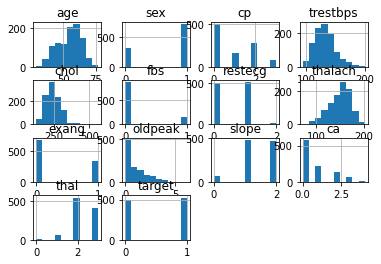

In [6]:
data.hist(rwidth=1)
'''A histogram shows the frequency on the vertical axis and the horizontal axis is another dimension. Usually it has bins, 
where every bin has a minimum and maximum value. Each bin also has a frequency between x and infinite.'''

# DATASET EVALUATION

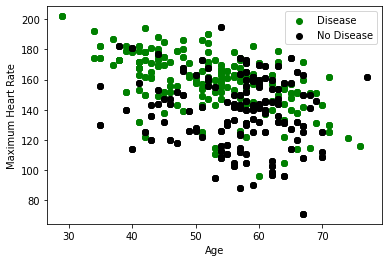

In [7]:
plt.scatter(x=data.age[data.target==1],
y=data.thalach[(data.target==1)], c="green")
plt.scatter(x=data.age[data.target==0],
y=data.thalach[(data.target==0)], c = 'black')
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [8]:
import seaborn as sns

In [9]:
data.target.value_counts()

1    526
0    499
Name: target, dtype: int64

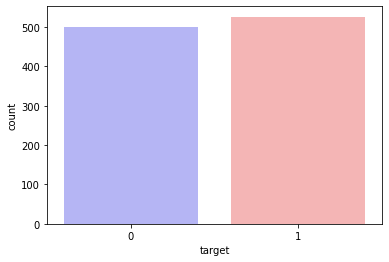

In [10]:
sns.countplot(x="target", data=data, palette="bwr")
plt.show()

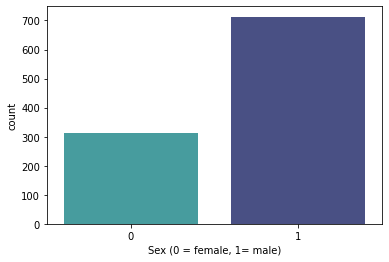

In [11]:
sns.countplot(x='sex', data=data, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

# CODE WHEN USING TRAIN-TEST-SPLIT

# TRAINING AND TESTING DATASET USING KNN AND DECISION TREE ALGORITHMS

In [12]:
X = data.iloc[:,0:13].values
y = data.iloc[:,13].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =
0.25, random_state=0)

In [13]:
print(X_train)

[[67.  1.  0. ...  1.  3.  2.]
 [50.  1.  0. ...  1.  0.  3.]
 [65.  1.  3. ...  1.  1.  2.]
 ...
 [65.  1.  3. ...  1.  1.  2.]
 [67.  1.  0. ...  1.  0.  2.]
 [60.  1.  2. ...  1.  0.  2.]]


In [14]:
print(y_train)

[0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1
 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0
 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1
 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1
 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1
 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1
 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1
 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0
 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1
 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0
 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1
 1 1 0 0 0 0 1 1 1 1 0 0 

In [15]:
from sklearn import metrics
classifier = KNeighborsClassifier(n_neighbors = 5, metric =
'minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)

In [16]:
k_range = range(1, 13)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[1.0, 0.9377431906614786, 0.8910505836575876, 0.8054474708171206, 0.7431906614785992, 0.754863813229572, 0.7431906614785992, 0.7509727626459144, 0.7626459143968871, 0.7898832684824902, 0.7782101167315175, 0.7665369649805448]


Text(0, 0.5, 'Testing Accuracy')

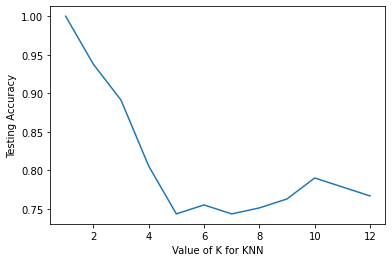

In [17]:

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [18]:
y_pred = classifier.predict(X_test)
#check accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.74


In [19]:
classifier = KNeighborsClassifier(n_neighbors = 2, metric ='minkowski')
classifier = classifier.fit(X_train,y_train)
#prediction
y_pred = classifier.predict(X_test)
#check accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.94


In [20]:
classifier = KNeighborsClassifier(n_neighbors = 6, metric ='minkowski')
classifier = classifier.fit(X_train,y_train)
#prediction
y_pred = classifier.predict(X_test)
#check accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.75


In [21]:
classifier = KNeighborsClassifier(n_neighbors = 7, metric ='minkowski')
classifier = classifier.fit(X_train,y_train)
#prediction
y_pred = classifier.predict(X_test)
#check accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.74


In [22]:
classifier = KNeighborsClassifier(n_neighbors = 8, metric ='minkowski')
classifier = classifier.fit(X_train,y_train)
#prediction
y_pred = classifier.predict(X_test)
#check accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.75


# Decision Tree

In [23]:
dtc = DecisionTreeClassifier()
clf=dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))



Test set score: 1.00


In [24]:
k_range = range(1, 13)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = DecisionTreeClassifier()
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Text(0, 0.5, 'Testing Accuracy')

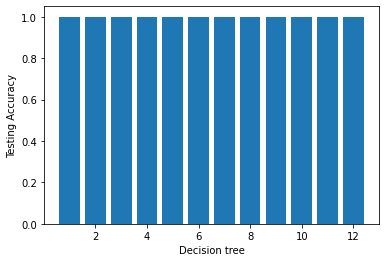

In [25]:
plt.bar(k_range, scores)
plt.xlabel('Decision tree')
plt.ylabel('Testing Accuracy')

TRAINING AND TESTING DATASET USING KNN AND DECISION TREE ALGORITHMS


# when test size=20%

In [26]:
X = data.iloc[:,:-1].values
y = data.iloc[:,13].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =
0.20, random_state= 0)

In [27]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1
 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0
 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1
 1 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1]


In [29]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.75


In [30]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [31]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))


Test set score: 1.00


# when test size=30%

In [32]:
X = data.iloc[:,:-1].values
y = data.iloc[:,13].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =
0.30, random_state= 0)

In [33]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1
 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0
 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0
 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1
 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1
 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0
 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0
 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1
 0 1 0 1 0 0 0 1 1 0 1 0]


In [35]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.89


In [36]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [37]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 1.00


# Principal Component Analysis


In [38]:
X = data.iloc[:,:-1].values
y = data.iloc[:,13].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.30, random_state= 0)

In [39]:
# Applying PCA function on training 
# and testing set of X component 
from sklearn.decomposition import PCA 

pca = PCA(n_components = 2) 

X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 

explained_variance = pca.explained_variance_ratio_ 
print(explained_variance)


[0.73739555 0.15610596]


In [40]:
# Fitting Logistic Regression To the training set 
from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train) 



LogisticRegression(random_state=0)

In [41]:
# Predicting the test set result using 
# predict function under LogisticRegression 
y_pred = classifier.predict(X_test) 


In [42]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))


Test set score: 0.73


In [40]:
print("Test set score: {:.2f}".format(classifier.score(X_test, y_test)))

Test set score: 0.73



# RANDOM FOREST

In [41]:
X = data.iloc[:,:-1].values
y = data.iloc[:,13].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.25, random_state= 0)

In [42]:
# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 

# create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 

# fit the regressor with x and y data 
regressor.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [43]:
y_pred = regressor.predict(X_test) # test the output by changing values 


In [44]:
print("Test set score: {:.2f}".format(regressor.score(X_test, y_test)))

Test set score: 0.98


# SUPPORT VECTOR MACHINE

In [51]:
X = data.iloc[:,:-1].values
y = data.iloc[:,13].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state= 0)

In [52]:
svm=SVC()

In [53]:
svm.fit(X_train, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [54]:
y_pred = svm.predict(X_test)

In [55]:
print("Test set score: {:.2f}".format(svm.score(X_test, y_test)))

Test set score: 0.98
